### Example of vanishing gradients with 10 hidden layers

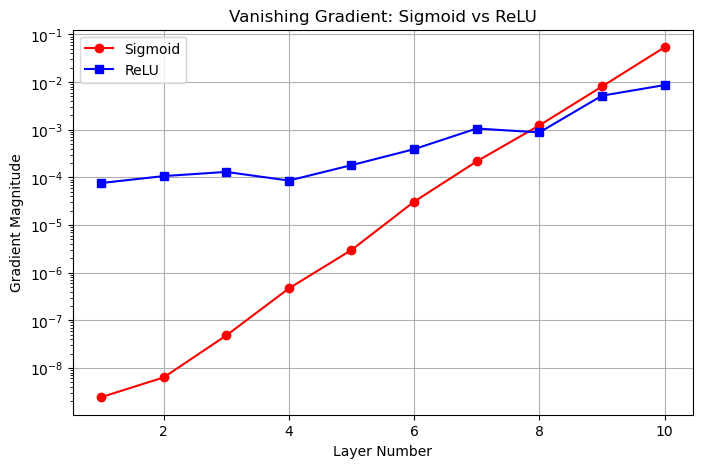

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define a deep neural network with a configurable activation function
class DeepNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, activation):
        super(DeepNet, self).__init__()
        self.layers = nn.ModuleList()
        self.num_layers = num_layers

        # First layer: Input to hidden size
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.append(activation)  # Activation function

        # Hidden layers: Maintain hidden_size x hidden_size
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(activation)  # Activation function

        # Output layer
        self.output_layer = nn.Linear(hidden_size, 1)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return self.output_layer(x)

# Function to compute gradients for a given activation function
def compute_gradients(activation_fn, activation_name):
    input_size = 5
    hidden_size = 10
    num_layers = 10

    model = DeepNet(input_size, hidden_size, num_layers, activation_fn)

    criterion = nn.MSELoss()
    x = torch.randn((1, input_size))  # Input data
    y = torch.tensor([[1.0]])  # Target

    # Forward pass
    output = model(x)

    # Compute loss
    loss = criterion(output, y)

    # Backward pass
    loss.backward()

    # Collect gradient magnitudes from each layer
    gradients = []
    for i, layer in enumerate(model.layers):
        if isinstance(layer, nn.Linear):  # Only track Linear layers
            gradients.append(layer.weight.grad.abs().mean().item())

    return gradients, activation_name

# Compute gradients for Sigmoid and ReLU
grad_sigmoid, name_sigmoid = compute_gradients(nn.Sigmoid(), "Sigmoid")
grad_relu, name_relu = compute_gradients(nn.ReLU(), "ReLU")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(grad_sigmoid) + 1), grad_sigmoid, marker='o', linestyle='-', label=name_sigmoid, color='r')
plt.plot(range(1, len(grad_relu) + 1), grad_relu, marker='s', linestyle='-', label=name_relu, color='b')
plt.xlabel("Layer Number")
plt.ylabel("Gradient Magnitude")
plt.title("Vanishing Gradient: Sigmoid vs ReLU")
plt.yscale("log")  # Log scale to highlight small values
plt.legend()
plt.grid()
plt.show()


### Example of vanishing gradients with 5 hidden layers

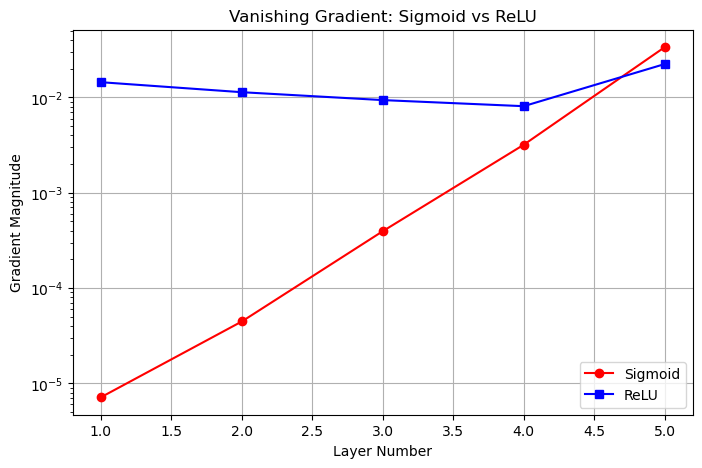

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define a deep neural network with a configurable activation function
class DeepNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, activation):
        super(DeepNet, self).__init__()
        self.layers = nn.ModuleList()
        self.num_layers = num_layers

        # First layer: Input to hidden size
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.append(activation)  # Activation function

        # Hidden layers: Maintain hidden_size x hidden_size
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(activation)  # Activation function

        # Output layer
        self.output_layer = nn.Linear(hidden_size, 1)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return self.output_layer(x)

# Function to compute gradients for a given activation function
def compute_gradients(activation_fn, activation_name):
    input_size = 5
    hidden_size = 10
    num_layers = 5

    model = DeepNet(input_size, hidden_size, num_layers, activation_fn)

    criterion = nn.MSELoss()
    x = torch.randn((1, input_size))  # Input data
    y = torch.tensor([[1.0]])  # Target

    # Forward pass
    output = model(x)

    # Compute loss
    loss = criterion(output, y)

    # Backward pass
    loss.backward()

    # Collect gradient magnitudes from each layer
    gradients = []
    for i, layer in enumerate(model.layers):
        if isinstance(layer, nn.Linear):  # Only track Linear layers
            gradients.append(layer.weight.grad.abs().mean().item())

    return gradients, activation_name

# Compute gradients for Sigmoid and ReLU
grad_sigmoid, name_sigmoid = compute_gradients(nn.Sigmoid(), "Sigmoid")
grad_relu, name_relu = compute_gradients(nn.ReLU(), "ReLU")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(grad_sigmoid) + 1), grad_sigmoid, marker='o', linestyle='-', label=name_sigmoid, color='r')
plt.plot(range(1, len(grad_relu) + 1), grad_relu, marker='s', linestyle='-', label=name_relu, color='b')
plt.xlabel("Layer Number")
plt.ylabel("Gradient Magnitude")
plt.title("Vanishing Gradient: Sigmoid vs ReLU")
plt.yscale("log")  # Log scale to highlight small values
plt.legend()
plt.grid()
plt.show()
